TODO
- change units to real units
- work on visualizations
- build shared data frame of stance vs swing phases per mouse
- build shared data frame of mobile vs immobile phases per mouse
- randomly sample 

In [1]:
pip install -q ..

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mouse_gait_analysis
import pandas as pd
import matplotlib.pyplot as plt

from mouse_gait_analysis.io import *
from mouse_gait_analysis.utils import *
from mouse_gait_analysis.plots import *

In [3]:
video_analysis = VideoAnalysis(
    "/home/andretelfer/shared/curated/thea/trial-analysis/videos/AccA19.mp4",
    "/home/andretelfer/shared/curated/thea/trial-analysis/labels/AccA19DLC_resnet50_A19allMar17shuffle1_1030000.h5")

In [4]:
video_analysis.keypoints = filter_likelihood(video_analysis.keypoints, 0.6)
video_analysis.keypoints = filter_distance_traveled(video_analysis.keypoints, 20, 5)

In [5]:
video = Path(video_analysis.video).parts[-1]

registration_points = pd.read_csv("/home/andretelfer/repos/mouse-gait-analysis/tests/test_data/registration_points.csv")
registration_points['video'] = registration_points.video.apply(lambda x: Path(x).parts[-1])
points = registration_points.groupby('video').get_group(video)[['y', 'x']].values
w, h = 500, 500
target = [[0,0], [w,0], [w,h], [0,h]]
target = np.array(target)
transformer = PerspectiveTransformer()
transformer.register(points, target)
transformer.apply(video_analysis.keypoints)
 

scorer    DLC_resnet50_A19allMar17shuffle1_1030000                        \
bodyparts                                     nose                         
coords                                           x          y likelihood   
0                                              NaN        NaN        NaN   
1                                              NaN        NaN        NaN   
2                                              NaN        NaN        NaN   
3                                              NaN        NaN        NaN   
4                                              NaN        NaN        NaN   
...                                            ...        ...        ...   
65941                                   472.441768  99.480621   0.999474   
65942                                   472.267146  99.390243   0.999180   
65943                                   471.890960  99.445802   0.998662   
65944                                   471.797125  99.543103   0.998043   
65945                                   471.859360  99.390328   0.997842   

scorer                                                                \
bodyparts       chest                           tailbase               
coords              x           y likelihood           x           y   
0                 NaN         NaN        NaN         NaN         NaN   
1                 NaN         NaN        NaN         NaN         NaN   
2                 NaN         NaN        NaN         NaN         NaN   
3                 NaN         NaN        NaN         NaN         NaN   
4                 NaN         NaN        NaN         NaN         NaN   
...               ...         ...        ...         ...         ...   
65941      463.048404  102.247323   0.999419  425.645241  102.681950   
65942      462.902560  102.267917   0.999339  425.639297  102.671389   
65943      462.607969  102.264329   0.999398  425.554023  102.672919   
65944      462.583589  102.227823   0.999388  425.576964  102.672898   
65945      462.658615  102.161297   0.999351  425.516854  102.686852   

scorer                               ...                                       \
bodyparts            left_front_paw  ...  left_toes left_back_paw               
coords    likelihood              x  ... likelihood             x           y   
0                NaN            NaN  ...        NaN           NaN         NaN   
1                NaN            NaN  ...        NaN           NaN         NaN   
2                NaN            NaN  ...        NaN           NaN         NaN   
3                NaN            NaN  ...        NaN           NaN         NaN   
4                NaN            NaN  ...        NaN           NaN         NaN   
...              ...            ...  ...        ...           ...         ...   
65941            1.0     468.807059  ...   0.999732    451.029679  108.795529   
65942            1.0     468.540853  ...   0.999656    450.971013  108.767724   
65943            1.0     469.170850  ...   0.999564    450.940139  108.712981   
65944            1.0     469.114485  ...   0.999545    450.937100  108.735888   
65945            1.0     469.084100  ...   0.999576    450.907633  108.752747   

scorer                                                                 \
bodyparts             right_toes                       right_back_paw   
coords    likelihood           x          y likelihood              x   
0                NaN         NaN        NaN        NaN            NaN   
1                NaN         NaN        NaN        NaN            NaN   
2                NaN         NaN        NaN        NaN            NaN   
3                NaN         NaN        NaN        NaN            NaN   
4                NaN         NaN        NaN        NaN            NaN   
...              ...         ...        ...        ...            ...   
65941       0.999999  456.897035  78.849864   0.999989     444.513007   
65942       0.999999  456.845522  78.920939   0.999989     44

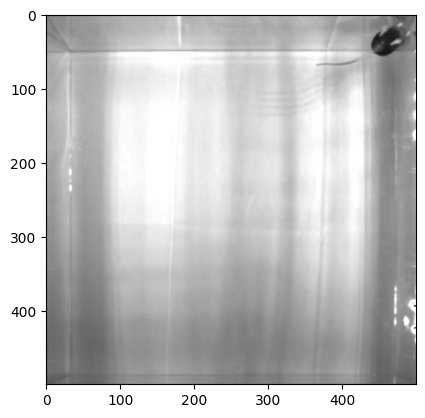

In [6]:
reader = VideoReader(video_analysis.video)
frame = reader[20000]
frame = transformer.apply(frame)
plt.imshow(frame)

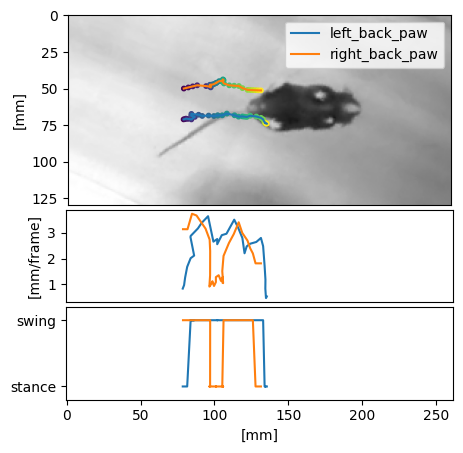

In [7]:
start = 30020
duration = 30
end = start + duration
bodyparts = ['left_back_paw', 'right_back_paw' ]
keypoints = transformer.apply(video_analysis.keypoints)
reader = VideoReader(video_analysis.video, transforms=[transformer])
visualize_step_by_distance(
    reader, keypoints, bodyparts, start, duration, marker_size=10, threshold=2)

plt.savefig('gait-step_2023-03-27.png')


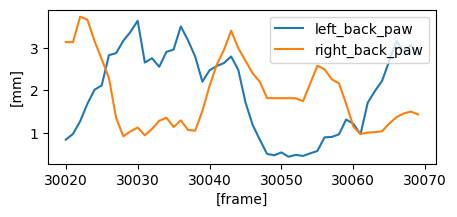

In [8]:
visualize_distances(keypoints, bodyparts, start, duration=50)

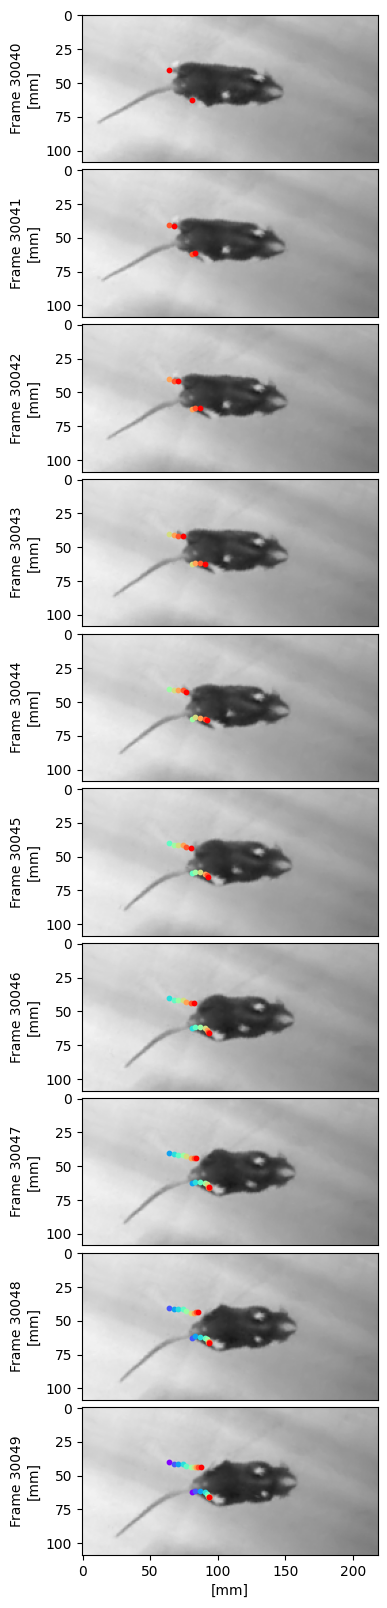

In [11]:
bodyparts = ['left_back_paw', 'right_back_paw']
visualize_step_over_time(
    reader, keypoints, bodyparts, start+20, duration=10, marker_size=10, width_height_ratio=2)
plt.savefig('gait-frames-2023-03-27.png')